Name: Daniel Adejumo

Net ID: dxa239

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## 1. Load and Preprocess Data
First, we load the dataset directly from the URL and convert the timestamp column to datetime objects.

In [2]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

# Load the data
print("Loading data...")
df = pd.read_csv(url, sep=',')

# Convert 'hour_beginning' to datetime objects for easy manipulation
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Rename columns for easier access (remove spaces, lowercase)
df.columns = [c.replace(' ', '_').lower() for c in df.columns]

# Preview the data
print(f"Data loaded successfully. Shape: {df.shape}\n\n")
print(df.head())

Loading data...


/tmp/ipykernel_31882/2760725563.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


Data loaded successfully. Shape: (16057, 12)


       hour_beginning         location  pedestrians  towards_manhattan  \
0 2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
1 2019-12-31 22:00:00  Brooklyn Bridge           10                  9   
2 2019-12-31 23:00:00  Brooklyn Bridge            2                  0   
3 2019-12-31 21:00:00  Brooklyn Bridge           12                  0   
4 2019-04-01 03:00:00  Brooklyn Bridge            1                  0   

   towards_brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                    

## Question 1: Weekday Analysis
Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.


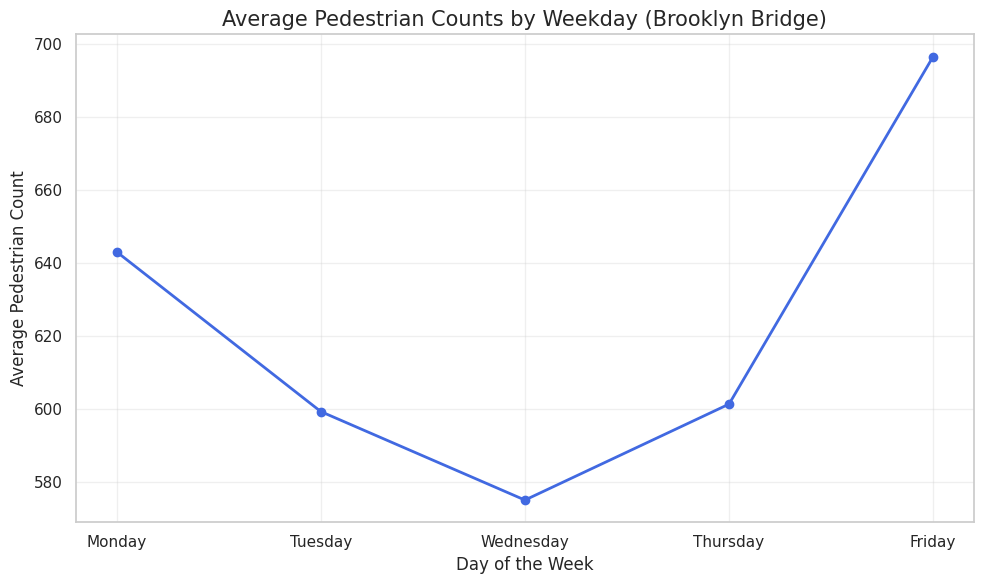

In [3]:
# Extract day name and day of week number (0=Monday, 6=Sunday)
df['day_name'] = df['hour_beginning'].dt.day_name()
df['day_of_week'] = df['hour_beginning'].dt.dayofweek

# Filter for weekdays only (Monday=0 to Friday=4)
weekdays_df = df[df['day_of_week'] < 5].copy()

# Define the correct order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Group by day name and calculate the average pedestrian count
# Average is used to normalize for the fact that the dataset might have uneven numbers of specific days
weekday_counts = weekdays_df.groupby('day_name')['pedestrians'].mean().reindex(day_order)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', linewidth=2, color='royalblue')

plt.title('Average Pedestrian Counts by Weekday (Brooklyn Bridge)', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Pedestrian Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Question 2: 2019 Weather Impact Analysis
Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity.

In [4]:
# Filter for the year 2019 and location 'Brooklyn Bridge'
df_2019 = df[(df['hour_beginning'].dt.year == 2019) & (df['location'] == 'Brooklyn Bridge')].copy()

# Sort by weather summary
df_2019_sorted = df_2019.sort_values(by='weather_summary')

print("Top 5 rows sorted by Weather Summary:")
print(df_2019_sorted[['hour_beginning', 'pedestrians', 'weather_summary', 'temperature', 'precipitation']].head())

Top 5 rows sorted by Weather Summary:
          hour_beginning  pedestrians weather_summary  temperature  \
2117 2019-05-31 06:00:00          188       clear-day         64.0   
1818 2019-08-24 10:00:00         1687       clear-day         70.0   
1814 2019-06-22 06:00:00          163       clear-day         62.0   
6831 2019-05-06 07:00:00          301       clear-day         53.0   
3816 2019-04-23 09:00:00         1086       clear-day         62.0   

      precipitation  
2117            0.0  
1818            0.0  
1814            0.0  
6831            0.0  
3816            0.0  


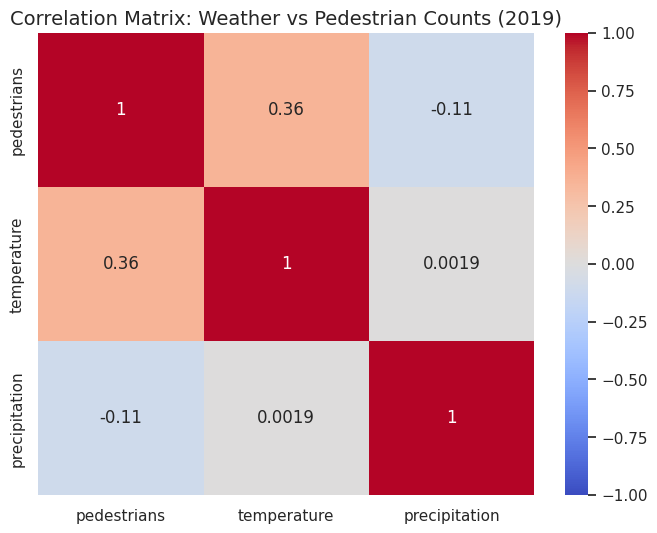

In [5]:
# Analysis: Correlation Matrix
# We select numerical weather columns and the pedestrian count
correlation_cols = ['pedestrians', 'temperature', 'precipitation']

# Calculate correlation
corr_matrix = df_2019[correlation_cols].corr()

# Plot Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: Weather vs Pedestrian Counts (2019)', fontsize=14)
plt.show()

/tmp/ipykernel_31882/2261041326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_weather.values, y=avg_by_weather.index, palette='viridis')


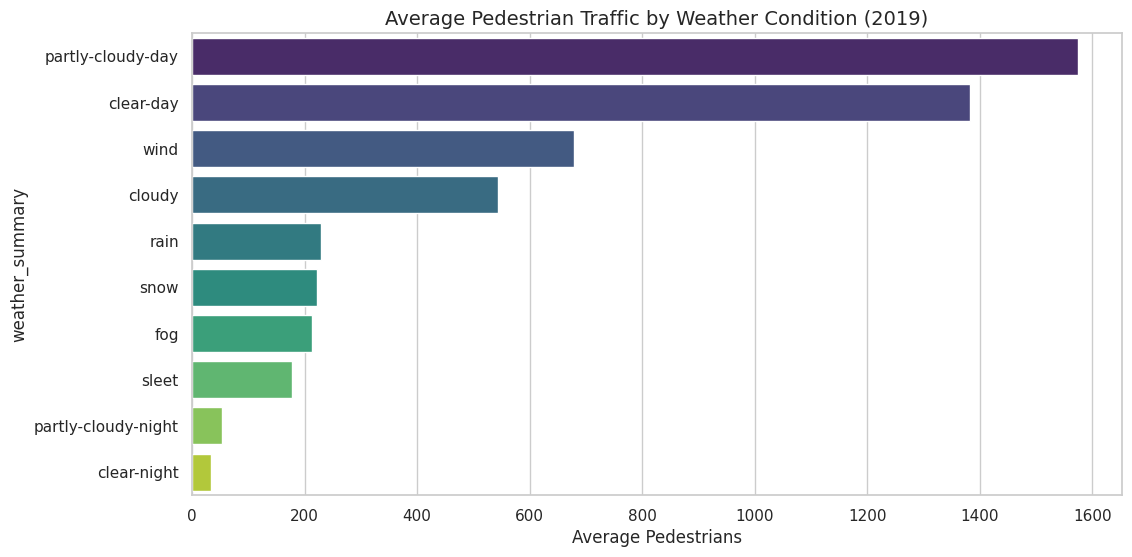

In [6]:
# Visualizing Pedestrians by Weather Summary
plt.figure(figsize=(12, 6))
avg_by_weather = df_2019.groupby('weather_summary')['pedestrians'].mean().sort_values(ascending=False)
sns.barplot(x=avg_by_weather.values, y=avg_by_weather.index, palette='viridis')
plt.title('Average Pedestrian Traffic by Weather Condition (2019)', fontsize=14)
plt.xlabel('Average Pedestrians')
plt.show()

## Question 3: Time of Day Categorization
Implement a custom function to categorize time of day and analyze patterns.

In [7]:
def categorize_time_of_day(hour):
    """
    Categorize an integer hour (0-23) into time of day.
    """
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from the timestamp
df['hour'] = df['hour_beginning'].dt.hour

# Apply the custom function to create the new column
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

# Define order for plotting logic
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Analyze pedestrian activity patterns
time_stats = df.groupby('time_of_day')['pedestrians'].agg(['mean', 'sum', 'count']).reindex(time_order)

print("\nPedestrian Activity by Time of Day:")
print(time_stats)


Pedestrian Activity by Time of Day:
                    mean      sum  count
time_of_day                             
Morning       529.699338  2480582   4683
Afternoon    1749.484305  5852025   3345
Evening       908.873318  2432145   2676
Night          50.086680   268114   5353


/tmp/ipykernel_31882/1349440232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_stats.index, y=time_stats['mean'], palette='magma')


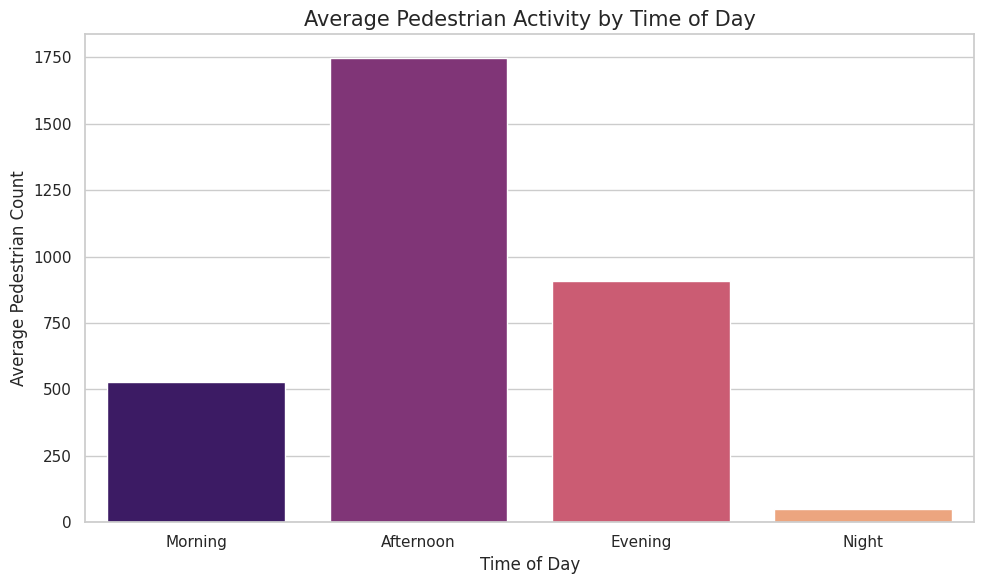

In [8]:
# Plotting the pattern
plt.figure(figsize=(10, 6))
sns.barplot(x=time_stats.index, y=time_stats['mean'], palette='magma')

plt.title('Average Pedestrian Activity by Time of Day', fontsize=15)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Pedestrian Count', fontsize=12)
plt.tight_layout()
plt.show()